In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('dataset_einstein.csv', delimiter=';')
dataset.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(5644, 11)

In [9]:
print(dataset['SARS-Cov-2 exam result'].value_counts())

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


In [10]:
#retirando valores nulos.
data_null = dataset.isnull().sum()
print(data_null)

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes. 0=no)              0
Patient addmited to semi-intensive unit (1=yes. 0=no)       0
Patient addmited to intensive care unit (1=yes. 0=no)       0
Hemoglobin                                               5041
Leukocytes                                               5042
Basophils                                                5042
Proteina C reativa mg/dL                                 5138
Creatinine                                               5220
dtype: int64


In [11]:
#ordenar em ordem crescente
data_null.sort_values(ascending=False).head()

Creatinine                  5220
Proteina C reativa mg/dL    5138
Leukocytes                  5042
Basophils                   5042
Hemoglobin                  5041
dtype: int64

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<AxesSubplot:>

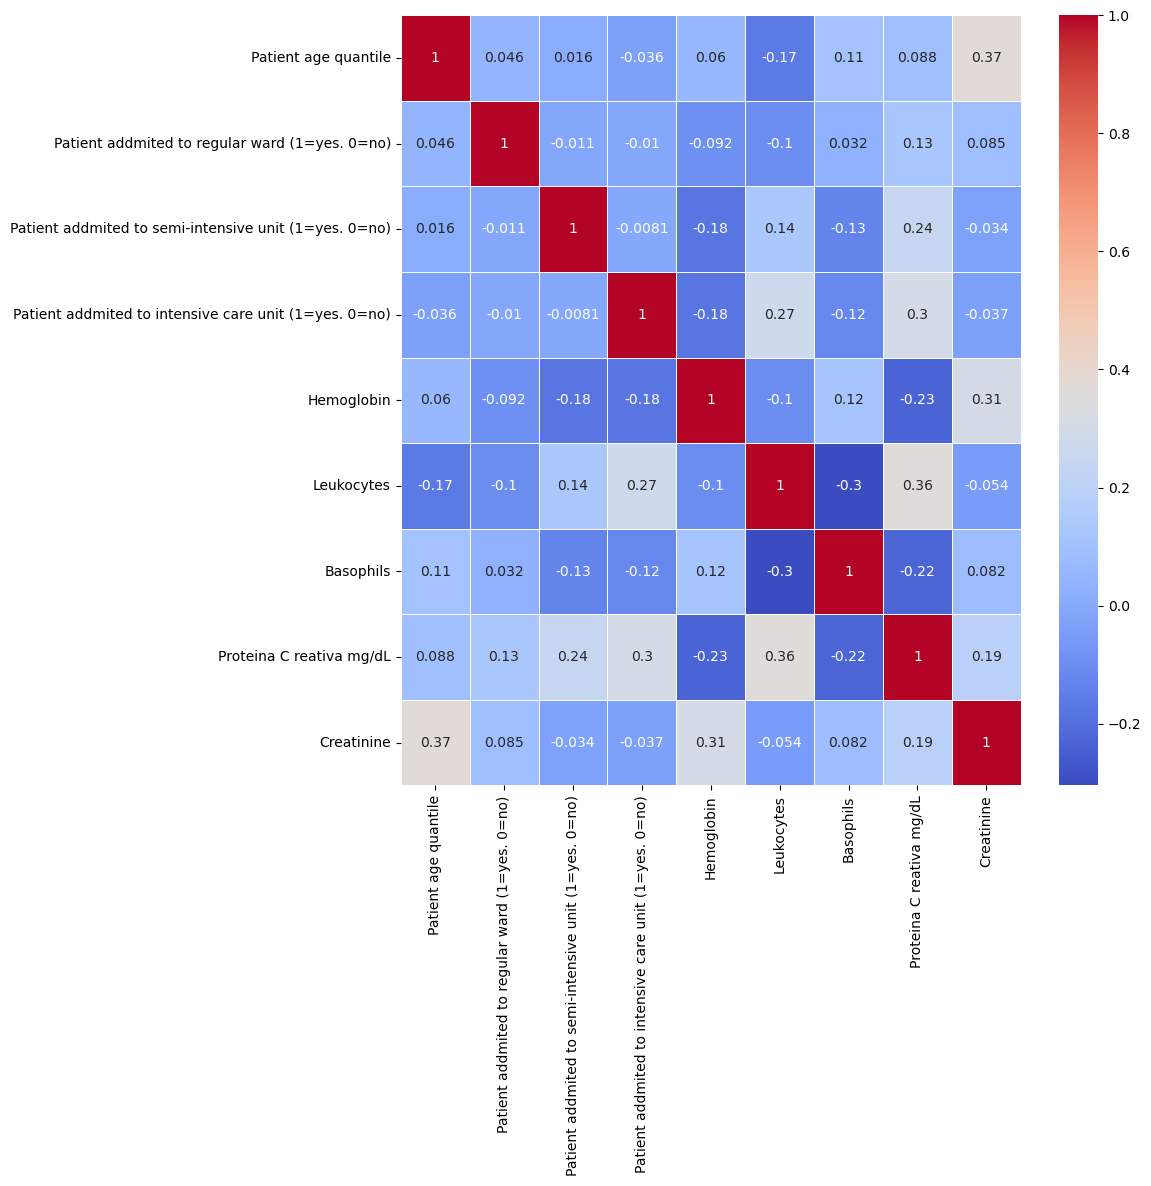

In [26]:
#criando mapa de calor e correlação entre os dados
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), annot=True, linewidths=0.5, square=False, cmap='coolwarm')

In [27]:
dataset = dataset.dropna()

In [30]:
dataset.head()
dataset.shape

(357, 11)

<AxesSubplot:>

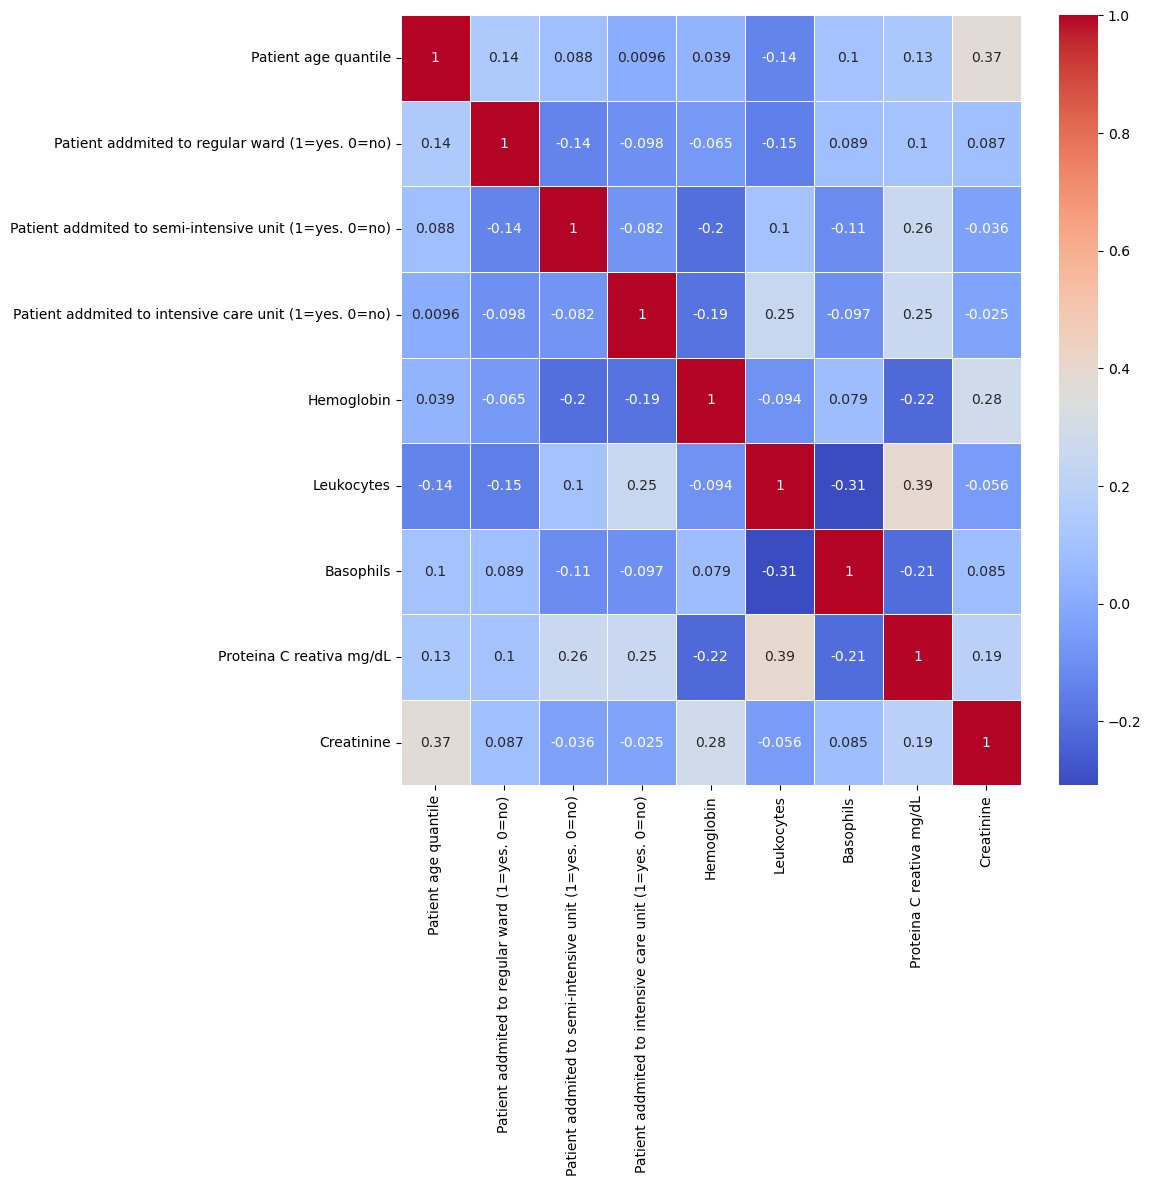

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), annot=True, linewidths=0.5, square=False, cmap='coolwarm')

In [32]:
print(dataset['SARS-Cov-2 exam result'].value_counts())

negative    302
positive     55
Name: SARS-Cov-2 exam result, dtype: int64


In [34]:
#Transformando com if e lista
lista = ['n', 'n', 'p', 'p', 'p', 'n']
i = 0
for x in lista:
    if x == 'n':
        lista[i] = 0
    else:
        lista[i] = 1
    i += 1
print(lista)

[0, 0, 1, 1, 1, 0]


In [35]:
#Outra forma de transformar com for e if
lista1 = ['n', 'n', 'p', 'p', 'p', 'n']
lista1 = [0 if x == 'n'else 1 for x in lista1]
print(lista1)

[0, 0, 1, 1, 1, 0]


In [36]:
#transformar o negativo e positivo no dataset
dataset['SARS-Cov-2 exam result'] = dataset['SARS-Cov-2 exam result'].map({'negative':0, 'positive':1})
print(dataset['SARS-Cov-2 exam result'])

1       0
8       0
28      0
29      0
30      0
       ..
5602    0
5614    0
5615    0
5618    0
5643    1
Name: SARS-Cov-2 exam result, Length: 357, dtype: int64


In [ ]:
#utilizando o metodo de for e if no dataset
#dataset['SARS-Cov-2 exam result'] = [0 if x == 'negative' else 1 for x in dataset SARS-Cov-2 exam result']

In [41]:
dataset.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
1,126e9dd13932f68,17,0,0,0,0,-0.022340,-0.094610,-0.223767,-0.147895,2.089928
8,8bb9d64f0215244,1,0,0,1,0,-0.774212,0.364550,-0.223767,-0.286986,-1.838623
28,fc41531ca4faf1e,13,0,0,0,0,0.854844,-0.075131,2.525365,-0.434025,-0.701411
29,891d0f6449ff3d7,14,0,0,0,0,0.854844,0.105751,-0.529226,-0.529401,0.332418
30,ebdd7c67fcb21b4,9,0,1,0,0,-0.711556,-0.286623,-0.223767,0.545572,1.021638


In [42]:
print(dataset['SARS-Cov-2 exam result'].value_counts())

0    302
1     55
Name: SARS-Cov-2 exam result, dtype: int64


In [49]:
X = dataset[['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL', 'Creatinine']].values
print (X)


[[-0.02234027 -0.09461035 -0.22376651 -0.14789495  2.08992839]
 [-0.774212    0.36455047 -0.22376651 -0.28698576 -1.83862317]
 [ 0.85484386 -0.07513076  2.52536511 -0.4340246  -0.70141089]
 ...
 [ 1.10546756 -0.5509882  -0.22376651  0.5614683  -0.49464503]
 [-2.77920342 -1.73367476 -1.14014375  0.60915661  0.4702622 ]
 [ 0.54156393 -1.28842807 -1.14014375 -0.50357002 -0.73587185]]


In [50]:
#Realizando o treino de modelo preditivo
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [51]:
y = dataset['SARS-Cov-2 exam result'].values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0
 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1]


In [72]:
#treinando o machine, testsize é o tmanho dos dados a serem treinados. ideal 80% teste 20% treino
#random state é o tamanho dos dados para a realização do treino
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
print(X_treino)

[[ 0.729532    3.77903604 -1.14014375 -0.41614151 -0.59802806]
 [-2.08998728  1.48323274 -0.83468473 -0.22340138 -0.90817678]
 [ 0.41625211  0.21427973 -0.22376651 -0.41018048  0.22903542]
 ...
 [ 1.10546756 -0.74578357  0.69261074 -0.34262207  0.91825485]
 [ 1.16812372 -0.07513076 -0.22376651 -0.51151806 -0.08111328]
 [-0.02234027 -0.09461035 -0.22376651 -0.14789495  2.08992839]]


In [73]:
#Ver a qualidade de X e Y de treino
decision_tree = DecisionTreeClassifier(criterion='entropy')
modelo = decision_tree.fit(X_treino, y_treino)

In [74]:
print(modelo)

DecisionTreeClassifier(criterion='entropy')


In [75]:
#criando o modelo preditivo
predicao = modelo.predict(X_teste)
print(predicao)

[0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0]


In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
acuracia = accuracy_score(y_teste, predicao)
print(acuracia)

0.8055555555555556


In [78]:
matriz_barraco = (classification_report(y_teste, predicao))
print(matriz_barraco)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        60
           1       0.43      0.50      0.46        12

    accuracy                           0.81        72
   macro avg       0.66      0.68      0.67        72
weighted avg       0.82      0.81      0.81        72

